# Doodle classifier


In [1]:
# Setup
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

import os
import sys
root_dir = os.path.join(os.getcwd(), '..')
sys.path.append(root_dir)

import numpy as np
import pandas as pd
import pickle
import random
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from src.data_loader import DataLoader as DL
from src.coach import train_in_batches

## Training

In [2]:
dl = DL()
test_x, test_y = dl.load_random_test_data(sample_size=300, return_1d=True)

Count line numbers in file: helicopter.ndjson
Count line numbers in file: octopus.ndjson
Count line numbers in file: pizza.ndjson


In [3]:
# Load model
clf = pickle.load(open('../model/clf_batches.sav', 'rb'))

In [6]:
set_path = '../img/test_set/'
# Clean up old files
for filename in os.listdir(set_path):
    if filename.endswith('.png'):
        file_path = set_path+filename
        try:
            os.remove(file_path)
        except OSError as e:
             print("Error: %s : %s" % (file_path, e.strerror))

# Load random images from data set and save in img/test folder
for label in dl.get_class_names():
    print(label)
    for i in random.sample(range(50_000, 60_000), 3):
        mat, word, raw = dl.load_image_matrix(label, i)
        dl.save_image(raw, name="{}{}{}".format(set_path, label, i))
        i_mat, i_img = dl.load_image("{}{}{}.png".format(set_path, label, i), is_array=False)
        print("expected: ", label, "got: ", dl.number_index[clf.predict([i_img])[0]])

helicopter
expected:  helicopter got:  octopus
expected:  helicopter got:  helicopter
expected:  helicopter got:  helicopter
octopus
expected:  octopus got:  octopus
expected:  octopus got:  octopus
expected:  octopus got:  pizza
pizza
expected:  pizza got:  pizza
expected:  pizza got:  pizza
expected:  pizza got:  pizza


In [7]:
# Test from test_set
for file in os.listdir(set_path):
    if file.endswith('.png'):
        i_mat, i_img = dl.load_image(set_path+file, is_array=False)
        print(file.split(".")[0][:-5], "\t Predicted:", dl.number_index[clf.predict([i_img])[0]])

helicopter 	 Predicted: helicopter
helicopter 	 Predicted: octopus
helicopter 	 Predicted: helicopter
octopus 	 Predicted: octopus
octopus 	 Predicted: pizza
octopus 	 Predicted: octopus
pizza 	 Predicted: pizza
pizza 	 Predicted: pizza
pizza 	 Predicted: pizza


In [8]:
# Test from test_hand
hand_path = '../img/test_hand/'
for file in os.listdir(hand_path):
    if file.endswith('.png'):
        i_mat, i_img = dl.load_hand_drawn(hand_path+file)
        print(file.split("_")[0], "\t Predicted:", dl.number_index[clf.predict([i_img])[0]])

helicopter 	 Predicted: helicopter
helicopter 	 Predicted: octopus
helicopter 	 Predicted: helicopter
octopus 	 Predicted: octopus
octopus 	 Predicted: octopus
octopus 	 Predicted: octopus
pizza 	 Predicted: pizza
pizza 	 Predicted: helicopter
pizza 	 Predicted: pizza


## Prediction

In [9]:
# Load random test data for confusion matrix
test_x, test_y = dl.load_random_test_data(sample_size=500, return_1d=True)
clf.score(test_x, test_y)

0.8253333333333334

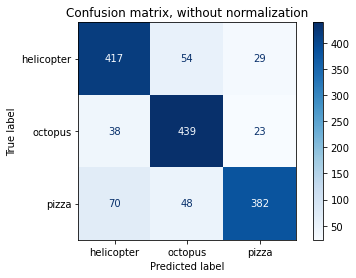

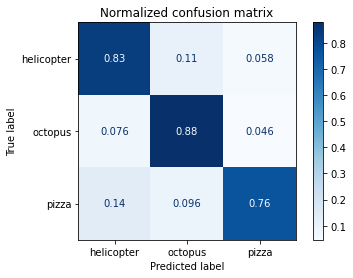

In [10]:
# Generate confusion matrix and plot
class_names = dl.get_class_names()
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, test_x, test_y,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)
    
plt.show()

### Results

| Parameter | Value | Results (Accuray) |
| --- | --- | --- |
| Hidden Layers | `(100,)` (default) | `0.811` |
| Hidden Layers | `(128, 128, 64)` | `0.868` |
| Hidden Layers | `(128,)` | `0.863` |


